In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/edited_topics_all_news.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,_id,topic,heading,content,tags,processed_content,processed_topic
0,0,0,5f04d2481f35ed6864839349,"[""West-bengal""]","[""\n "",""\n ...","[""Garbage-lined streets and overflowing drains...","[""Garbage"",""Salt-lake"",""Bidhannagar-municipal-...",garbag line street overflow drain salt lake sp...,west bengal
1,1,1,5f04d24b1f35ed686483934a,"[""West-bengal""]","[""\n "",""\n ...","[""The Bengal government will set up a plasma b...","[""Calcutta-medical-college-and-hospital"",""Coro...",bengal govern plasma bank calcutta medic colle...,west bengal
2,2,2,5f04d24d1f35ed686483934b,"[""West-bengal""]","[""\n "",""\n ...","[""Bengal set another 24-hour record on Monday ...","[""Lockdown"",""Coronavirus"",""Quarantine""]",bengal hour record monday highest number covid...,west bengal
3,3,3,5f04d2501f35ed686483934c,"[""West-bengal""]","[""\n "",""\n ...","[""Chief minister Mamata Banerjee on Monday sai...","[""Mamata-banerjee"",""Cyclone-amphan""]",chief minist mamata banerje monday say problem...,west bengal
4,4,4,5f04d2531f35ed686483934d,"[""West-bengal""]","[""\n "",""\n ...","[""Some senior historians have raised questions...","[""Jagat-prakash-nadda"",""Bharatiya-janata-party...",senior historian rais question attempt pitch b...,west bengal


In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
import logging
%matplotlib inline

In [13]:
#df.processed_content[0]

In [15]:
topic_names = df.processed_topic.unique()

In [22]:
num_docs = len(df.content)
num_docs

1274

In [16]:
texts = df.processed_content
y = np.array(df.processed_topic)
id2labels = {x[0]:x[1] for x in enumerate(topic_names)}

In [19]:
import collections
import nltk
#nltk.download('punkt')

#vocabulary
counter = collections.Counter()
for text in df.content:
    for sent in nltk.sent_tokenize(text):
        sent = sent.encode("utf8").decode("ascii", "ignore").lower()
        for word in nltk.word_tokenize(sent):
            counter[word] += 1
vocab_size = len([w for w, c in counter.most_common() if c >= 5])
print(vocab_size)

10465


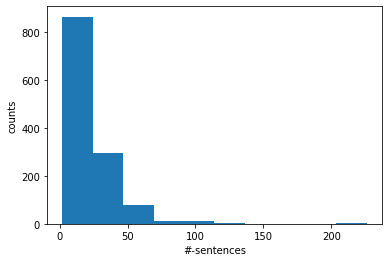

In [24]:
#Compute sentences per document

import matplotlib.pyplot as plt
num_sents = np.zeros(num_docs)
for i, text in enumerate(df.content):
    for sent in nltk.sent_tokenize(text):
        num_sents[i] += 1

plt.hist(num_sents, bins=10)
plt.xlabel("#-sentences")
plt.ylabel("counts")
plt.show()

In [25]:
for i in range(90, 100):
    print("{:d} percentile, #-sentences: {:.0f}".format(
        i, np.percentile(num_sents, i)))

90 percentile, #-sentences: 44
91 percentile, #-sentences: 46
92 percentile, #-sentences: 48
93 percentile, #-sentences: 51
94 percentile, #-sentences: 55
95 percentile, #-sentences: 58
96 percentile, #-sentences: 61
97 percentile, #-sentences: 67
98 percentile, #-sentences: 82
99 percentile, #-sentences: 108


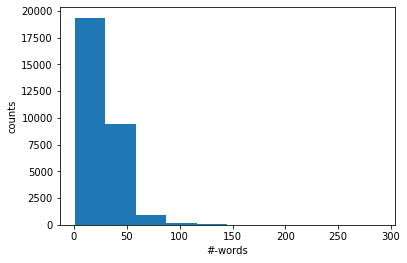

In [26]:
#Compute words per sentence

num_words = []
for i, text in enumerate(df.content):
    for sent in nltk.sent_tokenize(text):
        num_words_in_sent = 0
        for word in nltk.word_tokenize(sent):
            num_words_in_sent += 1
        num_words.append(num_words_in_sent)

plt.hist(num_words, bins=10)
plt.xlabel("#-words")
plt.ylabel("counts")
plt.show()

In [27]:
num_words = np.array(num_words)
for i in range(90, 100):
    print("{:d} percentile, #-sentences: {:.0f}".format(
        i, np.percentile(num_words, i)))

90 percentile, #-sentences: 46
91 percentile, #-sentences: 47
92 percentile, #-sentences: 48
93 percentile, #-sentences: 50
94 percentile, #-sentences: 52
95 percentile, #-sentences: 54
96 percentile, #-sentences: 57
97 percentile, #-sentences: 61
98 percentile, #-sentences: 66
99 percentile, #-sentences: 78
